Read Data
Selecting features =  88
Depth = 7
n_estimators = 3
accuracy =  0.699782505437
n_estimators = 5
accuracy =  0.697807554811
n_estimators = 10
accuracy =  0.619509512262
n_estimators = 15
accuracy =  0.691632709182


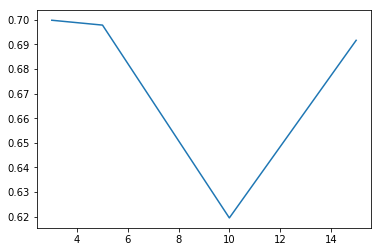

Depth = 10
n_estimators = 3
accuracy =  0.687407814805
n_estimators = 5


In [ ]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("trainless.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabelless.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validation.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)

k = [88]
maX = 0
depth = [7, 10, 15, 20]
n_esti = [3,5,10,15]

for i in range(len(k)):
    print("Selecting features = ", k[i])
    selection = SelectKBest(k=k[i]).fit(n_trainX, trainLabel)
    n_trainX_new = selection.transform(n_trainX)
    n_testX_new = selection.transform(n_testX)
    n_testdata_new = selection.transform(n_testdata)

    for j in range(len(depth)):
        print("Depth =", depth[j])
        accuracy = []
        for ij in range(len(n_esti)):
            print("n_estimators =", n_esti[ij])
            clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=depth[j]), n_estimators = n_esti[ij], 
                                     learning_rate=2)
            clf.fit(n_trainX_new, trainLabel)
            # compute accuracy
            result = clf.score(n_testX_new, testLabel)
            print("accuracy = ", result)
            accuracy.append(result)
            if (result > 0.78 and result > maX):
                maX = result
                print("Predict and write to file")
                answer = clf.predict(n_testdata_new)
                numpy.savetxt('result.csv', result, delimiter=',', fmt='%d')
        plt.plot(n_esti, accuracy)
        plt.show()



In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import csv

from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest

print('Read Data')
# Read train file
un_trainX = numpy.genfromtxt("trainless.csv", delimiter=',')
n_trainX = un_trainX / un_trainX.max(axis=0)
trainLabel = numpy.genfromtxt("trainLabelless.csv", delimiter=',')
# Read validation file
un_testX = numpy.genfromtxt("validation.csv", delimiter=',')
n_testX = un_testX / un_trainX.max(axis=0)
testLabel = numpy.genfromtxt("validationLabel.csv", delimiter=',')
# Read test file
un_testdata = numpy.genfromtxt("test.csv", delimiter=',')
n_testdata = un_testdata / un_trainX.max(axis=0)

k = [88]
maX = 0
depth = [7, 10, 15, 20]
n_esti = [20,50,70,100]

for i in range(len(k)):
    print("Selecting features = ", k[i])
    selection = SelectKBest(k=k[i]).fit(n_trainX, trainLabel)
    n_trainX_new = selection.transform(n_trainX)
    n_testX_new = selection.transform(n_testX)
    n_testdata_new = selection.transform(n_testdata)

    accuracy = []
    for j in range(len(depth)):
        print("Depth =", depth[j])

        for ij in range(len(n_esti)):
            print("n_estimators =", n_esti[ij])
            estimator = MLPClassifier(verbose=0, random_state=0, max_iter=100, 
                    solver='adam', learning_rate_init=0.0001)
            clf = AdaBoostClassifier(base_estimator = estimator, n_estimators = n_esti[ij], 
                                     learning_rate=2, random_state=0)
            clf.fit(n_trainX_new, trainLabel)
            # compute accuracy
            result = clf.score(n_testX_new, testLabel)
            print("accuracy = ", result)
            accuracy.append(result)
            if (result > 0.78 and result > maX):
                maX = result
                print("Predict and write to file")
                answer = clf.predict(n_testdata_new)
                numpy.savetxt('result.csv', result, delimiter=',', fmt='%d')
        plt.plot(n_esti, accuracy)
        plt.show()



Read Data
Selecting features =  88
Depth = 7
n_estimators = 20


ValueError: MLPClassifier doesn't support sample_weight.